# goodreads.com dataset

### This dataset is from the site Goodreads, it contains data on 11,123 books. Some of the books are reprints of previously published books. The dataset has twelve columns, a few are `title`, `ratings_count` and `publication_date`. I am going to explore the different genres in the dataset to find what kinds of books have the highest ratings.

In [71]:
# import and load the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
# load data
df = pd.read_csv(r"C:\Users\adame\OneDrive\Documents\GitHub\springboard_repository\Capstone_books\Capstone_books\data\raw\Goodreads_books_with_genres.csv")
grouped_df = df.groupby(['Book Id', 'Title','Author', 'genres', 'num_pages', 'ratings_count', 'publisher', 'publication_date'], sort=True)['average_rating'].mean().reset_index()
grouped_df.sort_values(by='ratings_count', ascending=False, inplace=True)
grouped_df['publication_date'] = pd.to_datetime(grouped_df['publication_date'], errors='coerce')

In [72]:
# Assuming the date format in the 'publication_date' column is 'YYYY-MM-DD'
grouped_df['publication_year'] = pd.to_datetime(grouped_df['publication_date'], format='mixed').dt.year
grouped_df = grouped_df.dropna(subset=['publication_date', 'publication_year'])

### Let's plot the data by the average rating. Looks like the average is around 4. 

C:\Users\adame\anaconda3_newest\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


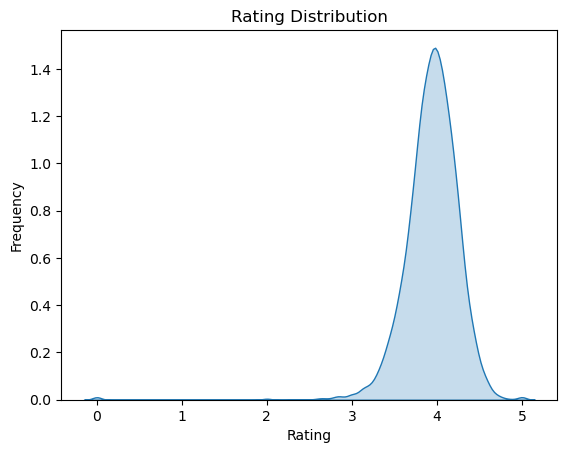

In [160]:
sns.kdeplot(grouped_df['average_rating'], fill=True)
_ = plt.title('Rating Distribution')
_ = plt.xlabel('Rating')
_ = plt.ylabel('Frequency')

plt.show()

### This is the distribution of books with above average ratings.

C:\Users\adame\anaconda3_newest\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


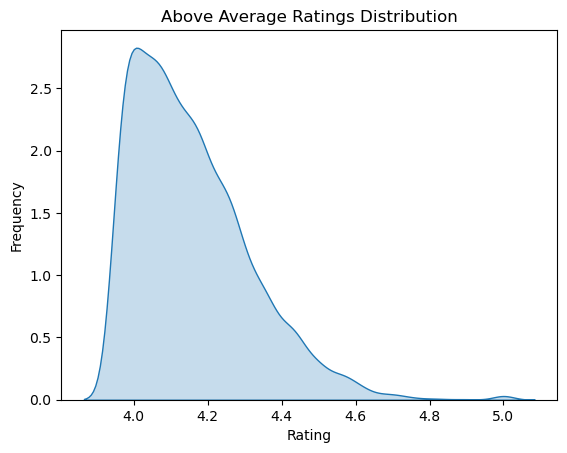

The mean ratings count is 21916.15
The average rating is 3.94


In [158]:
average_rating = round(grouped_df['average_rating'].mean(), 2)
above_average = grouped_df[grouped_df['average_rating'] > average_rating]
above_average = above_average[above_average['ratings_count'] > 0]
mean_ratings_count = round(above_average['ratings_count'].mean(), 2)
sns.kdeplot(above_average.average_rating, fill=True)
_ = plt.title('Above Average Ratings Distribution')
_ = plt.xlabel('Rating')
_ = plt.ylabel('Frequency')
plt.show()

print(f'The mean ratings count is {mean_ratings_count}')
print(f'The average rating is {average_rating}')

###  Below is the average rating plotted against the ratings count. Some of these books have a lot of ratings, the mean value for the 'ratings_count' column is 21,910. 

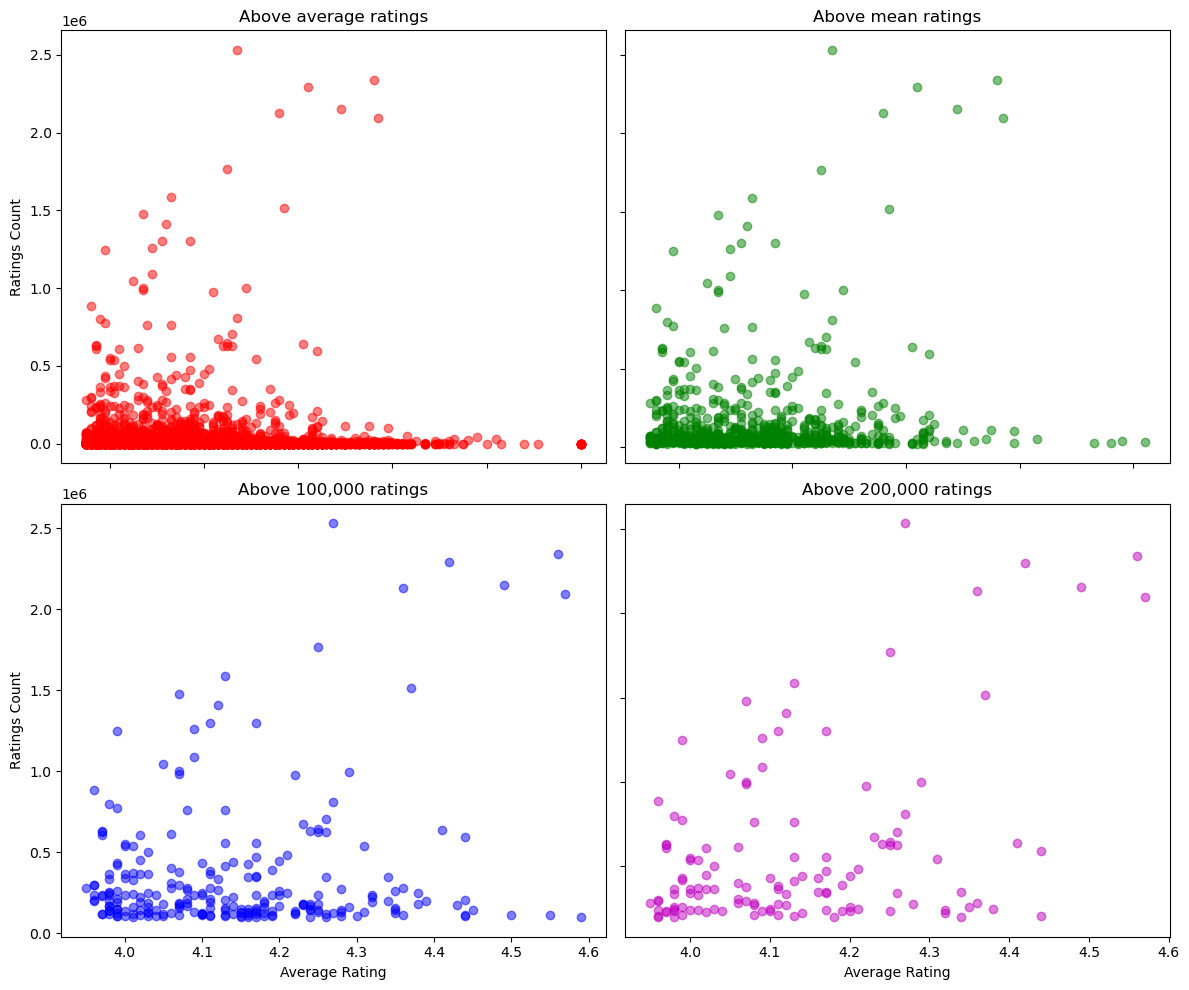

In [78]:
above_average_above_mean = above_average[above_average['ratings_count'] > mean_ratings_count]
above_hundredK = above_average[above_average['ratings_count'] > 100000]
above_two_hundredK = above_average[above_average['ratings_count'] > 200000]


fig, axs = plt.subplots(2, 2, figsize=(12,10))
axs[0,0].scatter(above_average['average_rating'], above_average['ratings_count'], c='r', alpha=0.5)
axs[0,0].set_title('Above average ratings')

axs[0,1].scatter(above_average_above_mean['average_rating'], above_average_above_mean['ratings_count'], c='g', alpha=0.5)
axs[0,1].set_title('Above mean ratings')

axs[1,0].scatter(above_hundredK['average_rating'], above_hundredK['ratings_count'], c='b', alpha=0.5)
axs[1,0].set_title('Above 100,000 ratings')

axs[1,1].scatter(above_two_hundredK['average_rating'], above_two_hundredK['ratings_count'], c='m', alpha=0.5)
axs[1,1].set_title('Above 200,000 ratings')

for ax in axs.flat:
    ax.set(xlabel='Average Rating', ylabel='Ratings Count')
    ax.label_outer()

plt.tight_layout()
plt.show()

### Let's see another breakdown of these books

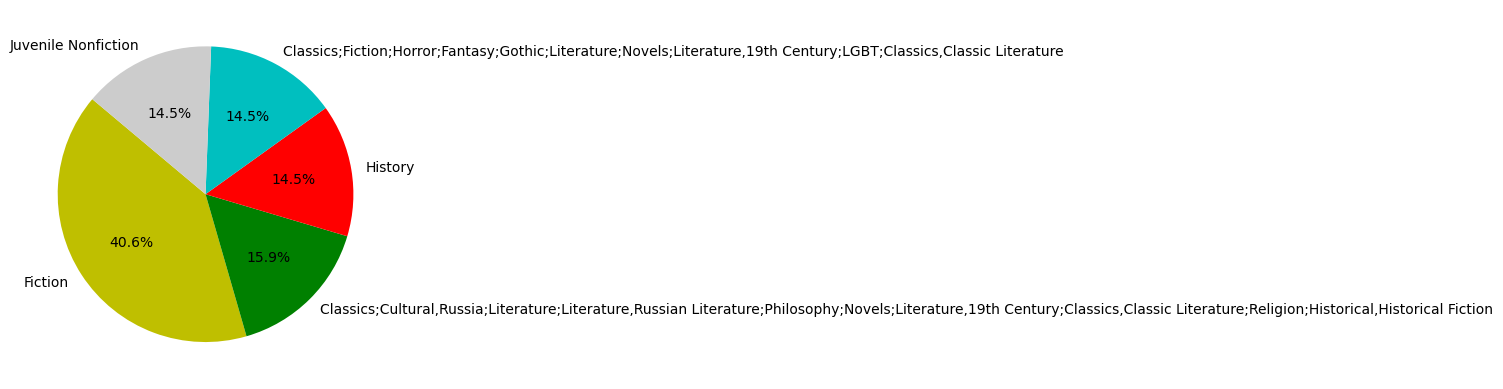

In [162]:
labels = above_average['genres'].value_counts().head(5)
plt.pie(above_average['genres'].value_counts().head(5), 
        labels=top_genres_counts.index, 
        colors=['y', 'g', 'r', 'c', '0.8'], 
        autopct='%1.1f%%', 
        startangle=140)

plt.show()

### Fiction,  Juvenile Nonfiction, History, and books that have a mix of genres are the top genres in the above average group. 

### Next I will plot the average book rating over time in years, to see how it looks. 

C:\Users\adame\anaconda3_newest\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\adame\anaconda3_newest\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


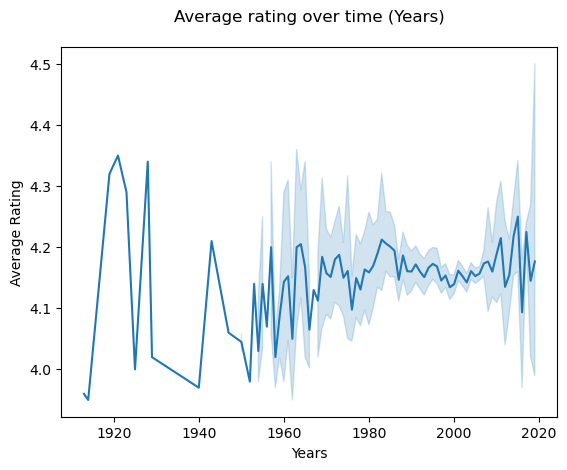

In [152]:
sns.lineplot(x='publication_year', y='average_rating', data=above_average)
_ = plt.title('Average rating over time (Years)\n')
_ = plt.xlabel('Years')
_ = plt.ylabel('Average Rating')
plt.show()

### This plot looks good, it seems older books may have less ratings count than newer books. There also seems to be a positive trend in the plot. The newer the book the higher the average rating. I am sure there are many guess as to why.

### Next I will plot the number pages versus the average rating.

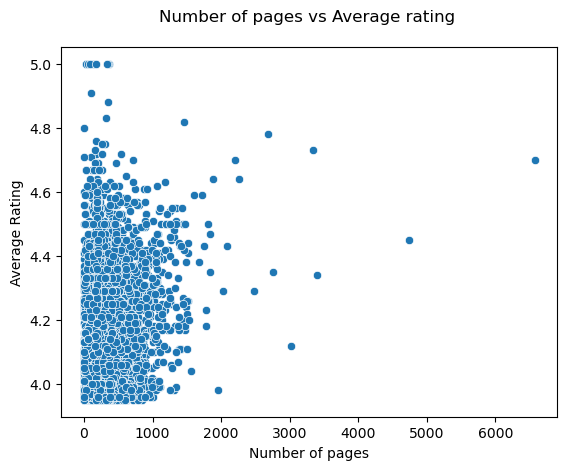

In [156]:
sns.scatterplot(data=above_average, x='num_pages', y='average_rating')
_ = plt.title('Number of pages vs Average rating \n')
_ = plt.xlabel('Number of pages')
_ = plt.ylabel('Average Rating')
plt.show()

### At first glance this grpah looks like a mess. But most of the best performing books have less than 1000 pages. Surprisingly someone likes a book with over 6000 pages!